In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
card_re = pd.read_csv("CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt", sep ="\t")


In [21]:
card_fo = pd.read_csv("CARD_SPENDING_FOREIGNER/CARD_SPENDING_FOREIGNER.txt", sep ="\t", encoding='CP949')

In [22]:
card_re.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433


In [23]:
card_fo.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,COUNTRY_NM,USE_CNT,USE_AMT
0,20190204,260,510,81,대만,2,30.0
1,20190213,260,510,40,대만,2,32.0
2,20190416,260,510,40,대만,2,16.0
3,20190419,260,510,42,대만,3,610.0
4,20190308,260,510,10,대만,7,629.0


In [26]:
print(card_re.shape)
print(card_fo.shape)

(2537753, 8)
(238829, 7)


- 외국인 데이터는 내국인에 비해 10분의 1

In [27]:
card_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537753 entries, 0 to 2537752
Data columns (total 8 columns):
STD_DD        int64
GU_CD         int64
DONG_CD       int64
MCT_CAT_CD    int64
SEX_CD        object
AGE_CD        int64
USE_CNT       int64
USE_AMT       int64
dtypes: int64(7), object(1)
memory usage: 154.9+ MB


In [90]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:6])

def year_month(data):
    data = str(data)
    return int(data[0:6])

In [32]:
card_re['year'] = card_re['STD_DD'].apply(lambda x: grap_year(x))
card_re['month'] = card_re['STD_DD'].apply(lambda x: grap_month(x))

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,AGE_CD,USE_CNT,USE_AMT,year,month
STD_DD,1.000000,0.005508,0.010944,0.024779,0.003648,-0.012222,-0.017655,0.999747,0.022204
GU_CD,0.005508,1.000000,0.250720,0.039982,0.009963,-0.040352,-0.074467,0.005541,-0.001373
DONG_CD,0.010944,0.250720,1.000000,0.049414,0.006576,-0.106927,-0.130110,0.010923,0.001029
MCT_CAT_CD,0.024779,0.039982,0.049414,1.000000,0.040777,0.042225,0.009865,0.024832,-0.002377
AGE_CD,0.003648,0.009963,0.006576,0.040777,1.000000,-0.061152,-0.005489,0.003546,0.004300
USE_CNT,-0.012222,-0.040352,-0.106927,0.042225,-0.061152,1.000000,0.621477,-0.012392,0.007224
USE_AMT,-0.017655,-0.074467,-0.130110,0.009865,-0.005489,0.621477,1.000000,-0.017826,0.006779
year,0.999747,0.005541,0.010923,0.024832,0.003546,-0.012392,-0.017826,1.000000,-0.000217
month,0.022204,-0.001373,0.001029,-0.002377,0.004300,0.007224,0.006779,-0.000217,1.000000


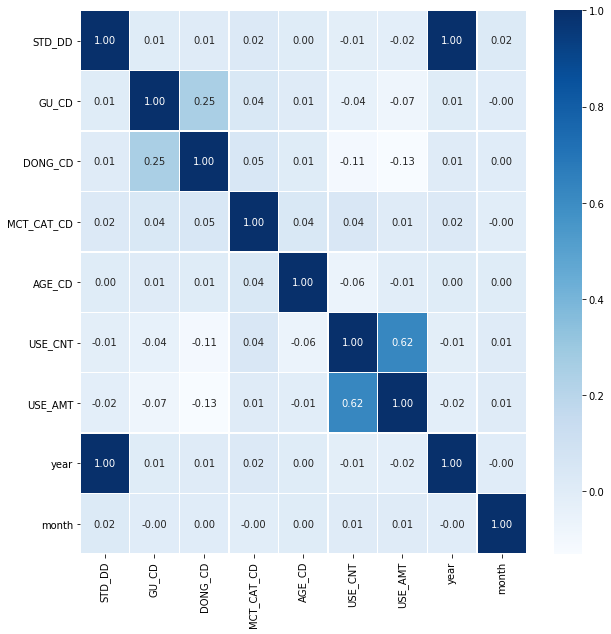

In [40]:
plt.figure(figsize=(10, 10))
sns.heatmap(data = card_re.corr(), annot=True, fmt= '.2f', linewidths=.5, cmap='Blues')
card_re.corr()

In [41]:
card_re.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,year,month
0,20190201,110,517,10,F,25,11,595,2019,2
1,20190201,110,517,10,F,50,5,243,2019,2
2,20190201,110,517,10,F,55,5,27,2019,2
3,20190201,110,517,10,M,20,11,243,2019,2
4,20190201,110,517,10,M,25,11,433,2019,2


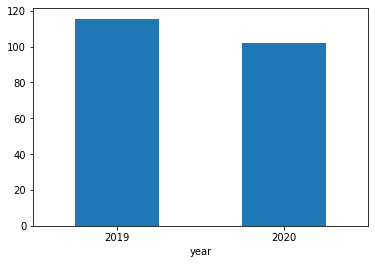

In [55]:
card_re.groupby("year")["USE_CNT"].mean().plot(kind="bar", rot=0)

- 역시나 2020년 이용건수 감소

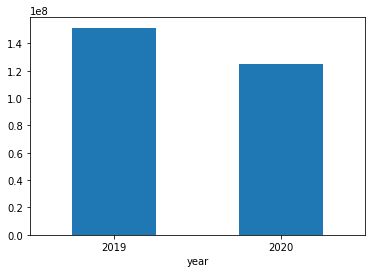

In [56]:
card_re.groupby("year")["USE_CNT"].sum().plot(kind="bar", rot=0)

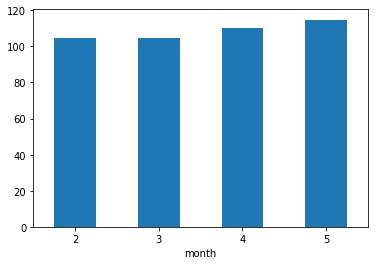

In [61]:
card_re.groupby("month")["USE_CNT"].mean().plot(kind="bar", rot=0)

- 2019+2020년 합친 달 별로 봤을 때는 계속 증가

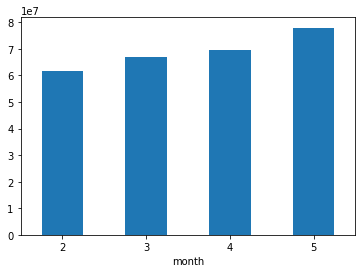

In [62]:
card_re.groupby("month")["USE_CNT"].sum().plot(kind="bar", rot=0)

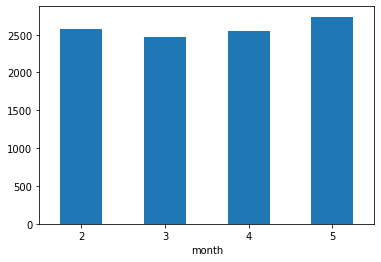

In [64]:
card_re.groupby("month")["USE_AMT"].mean().plot(kind="bar", rot=0)

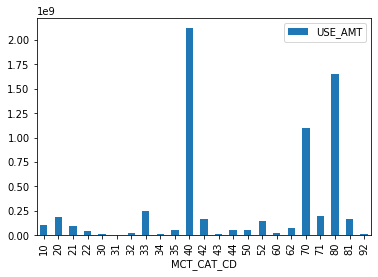

In [70]:
pd.DataFrame(card_re.groupby('MCT_CAT_CD')['USE_AMT'].sum()).plot(kind="bar")

- 내국인 업종별 총액을 봤을 때, 40 >>>> 80 >>> 70 >> | 넘사벽 | > 20, 33, 71, 81
- 40:유통업, 80:요식업소, 70:의료기관

In [73]:
card_re[card_re['year']==2019]

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,year,month
0,20190201,110,517,10,F,25,11,595,2019,2
1,20190201,110,517,10,F,50,5,243,2019,2
2,20190201,110,517,10,F,55,5,27,2019,2
3,20190201,110,517,10,M,20,11,243,2019,2
4,20190201,110,517,10,M,25,11,433,2019,2
...,...,...,...,...,...,...,...,...,...,...
1310601,20190531,350,720,81,M,45,9,48,2019,5
1310602,20190531,350,720,81,M,50,13,72,2019,5
1310603,20190531,350,720,81,M,60,9,99,2019,5
1310604,20190531,350,720,81,M,65,9,133,2019,5


In [12]:
card = card.set_index("STD_DD")

In [6]:
card.head()

,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
STD_DD,,,,,,,
20190201,110,517,10,F,25,11,595
20190201,110,517,10,F,50,5,243
20190201,110,517,10,F,55,5,27
20190201,110,517,10,M,20,11,243
20190201,110,517,10,M,25,11,433


In [8]:
card.gr

MCT_CAT_CD
10     105099769
20     183522267
21      97166974
22      37906017
30      16149595
31       2141099
32      18188087
33     246875042
34      13968193
35      57704475
40    2121439416
42     168552236
43      16011717
44      49699276
50      56773621
52     148393638
60      22961364
62      72519904
70    1100217294
71     195694309
80    1649543876
81     166360530
92      16627350
Name: USE_AMT, dtype: int64

# 성별별 유동인구 매출액 관계

In [82]:
man_flow = pd.read_csv("man_flow.csv")
woman_flow = pd.read_csv("woman_flow.csv")

In [83]:
man_flow.head()

,Unnamed: 0,STD_YM,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2529,MAN_FLOW_POP_CNT_3539,MAN_FLOW_POP_CNT_4549,MAN_FLOW_POP_CNT_5559,MAN_FLOW_POP_CNT_6569,MAN_FLOW_POP_CNT_70U,corona
0,0,201902,232546.34,1134165.89,2708266.18,6890266.59,9125174.41,10807517.72,9454608.89,6028797.46,6295626.87,0
1,1,201903,286187.30,1175055.60,3623906.63,7792206.10,10355000.58,12417681.37,10845519.13,7013959.12,7393928.17,0
2,2,201904,282272.23,1331063.73,3557288.55,6933540.50,9382103.87,11260388.19,9550760.25,5840692.89,6548823.12,0
3,3,201905,347215.30,1574839.03,4024116.69,7381162.63,9658166.28,11641408.49,9794465.51,6030545.19,6814908.80,0
4,4,202002,155857.42,922387.41,1958302.10,5545092.66,7366179.59,8952555.86,7734060.29,5114608.92,5456068.84,3736


In [84]:
man_flow.columns

Index(['Unnamed: 0', 'STD_YM', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2529', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4549', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6569', 'MAN_FLOW_POP_CNT_70U', 'corona'],
      dtype='object')

In [87]:
man_flow = man_flow.drop("Unnamed: 0", axis=1)
woman_flow = woman_flow.drop("Unnamed: 0", axis=1)

In [88]:
man_flow.head()

,STD_YM,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2529,MAN_FLOW_POP_CNT_3539,MAN_FLOW_POP_CNT_4549,MAN_FLOW_POP_CNT_5559,MAN_FLOW_POP_CNT_6569,MAN_FLOW_POP_CNT_70U,corona
0,201902,232546.34,1134165.89,2708266.18,6890266.59,9125174.41,10807517.72,9454608.89,6028797.46,6295626.87,0
1,201903,286187.30,1175055.60,3623906.63,7792206.10,10355000.58,12417681.37,10845519.13,7013959.12,7393928.17,0
2,201904,282272.23,1331063.73,3557288.55,6933540.50,9382103.87,11260388.19,9550760.25,5840692.89,6548823.12,0
3,201905,347215.30,1574839.03,4024116.69,7381162.63,9658166.28,11641408.49,9794465.51,6030545.19,6814908.80,0
4,202002,155857.42,922387.41,1958302.10,5545092.66,7366179.59,8952555.86,7734060.29,5114608.92,5456068.84,3736


In [89]:
woman_flow.head()

,STD_YM,WMAN_FLOW_POP_CNT_0509,WMAN_FLOW_POP_CNT_1014,WMAN_FLOW_POP_CNT_1519,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U,corona
0,201902,299939.44,1242765.53,2826662.84,6443197.26,6864901.20,8038490.63,6409848.15,3271200.31,3910136.70,0
1,201903,352120.05,1245996.24,3782645.61,7370091.49,7714598.67,9244190.59,7413932.95,3910055.08,4699847.17,0
2,201904,348459.63,1411144.51,3657689.10,6665583.07,7364994.62,8874829.83,7054721.55,3802215.91,4923173.83,0
3,201905,426573.07,1704684.32,4400093.47,7010484.63,7784971.89,9395634.37,7349147.32,3988199.72,5232023.42,0
4,202002,191506.55,953397.45,1972919.27,5190908.40,5221749.59,6508280.75,5202936.24,3064194.75,3867147.32,3736


In [91]:
# 년월별로만 묶음
card_re['STD_YM'] = card_re['STD_DD'].apply(lambda x: year_month(x))

In [92]:
card_re.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,year,month,STD_YM
0,20190201,110,517,10,F,25,11,595,2019,2,201902
1,20190201,110,517,10,F,50,5,243,2019,2,201902
2,20190201,110,517,10,F,55,5,27,2019,2,201902
3,20190201,110,517,10,M,20,11,243,2019,2,201902
4,20190201,110,517,10,M,25,11,433,2019,2,201902


In [103]:
# 년도별 성별별 매출액
card_sex = card_re.pivot_table("USE_AMT","STD_YM","SEX_CD")

In [107]:
card_sex = card_sex.reset_index()

In [109]:
card_sex.head()

SEX_CD,STD_YM,F,M
0,201902,2836.319249,2668.449004
1,201903,2829.027770,2669.219104
2,201904,2830.727156,2660.909980
3,201905,2869.790840,2674.698156
4,202002,2451.052408,2369.657882


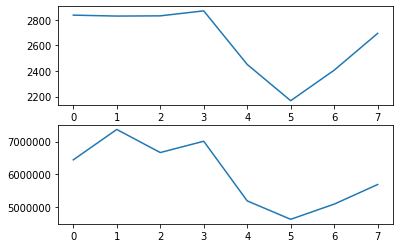

In [111]:
# 여성 월별 카드소비 매출액
# 위 카드소비, 아래 유동인구
plt.subplot(2,1,1)
plt.plot(card_sex["F"])
plt.subplot(2,1,2)
plt.plot(woman_flow["WMAN_FLOW_POP_CNT_2529"])

- 2019년에 일정하다가 코로나 이후로 팍 떨어진 후, 다시 급상승
- 유동인구와 비슷한 형태를 띄고 있음

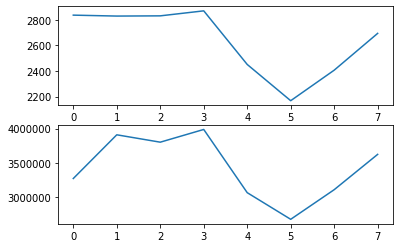

In [113]:
plt.subplot(2,1,1)
plt.plot(card_sex["F"])
plt.subplot(2,1,2)
plt.plot(woman_flow["WMAN_FLOW_POP_CNT_6569"])

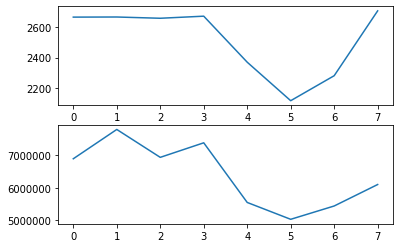

In [112]:
plt.subplot(2,1,1)
plt.plot(card_sex["M"])
plt.subplot(2,1,2)
plt.plot(man_flow["MAN_FLOW_POP_CNT_2529"])

- 마찬가지로 일정하다가 팍 떨어지고 급상승, 여성보다 상승의 폭이 초반에는 작았다가 갑자기 팍 오름